# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

Para ajustar o orçamento de publicidade de forma eficiente, o departamento comercial está buscando identificar qual dos planos de vendas está gerando maior receita. Essa análise permitirá uma alocação de recursos mais precisa, otimizando o investimento em campanhas publicitárias de acordo com o desempenho financeiro de cada plano.

## Inicialização

In [28]:
# Carregando todas as bibliotecas

import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns

## Carregue os dados

In [29]:
# Carregue os arquivos de dados em diferentes DataFrames

df_call = pd.read_csv('/datasets/megaline_calls.csv') # Baixar o conjunto de dados

df_internet =  pd.read_csv('/datasets/megaline_internet.csv') # Baixar o conjunto de dados

df_messages =  pd.read_csv('/datasets/megaline_messages.csv') # Baixar o conjunto de dados

df_plans =  pd.read_csv('/datasets/megaline_plans.csv') # Baixar o conjunto de dados

df_users =  pd.read_csv('/datasets/megaline_users.csv') # Baixar o conjunto de dados


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [30]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos

df_plans.head()
df_plans.info()
df_plans.describe()
df_plans.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


0

A análise superficial mostra que os dados parecem estar bem organizados e sem sinais de duplicação visível nos resumos.

## Corrija os dados

Conclusão preliminar sobre os dados:
Ausência de dados nulos ou incompletos: Todas as colunas principais nos DataFrames têm contagem de valores não nulos igual ao total de linhas, exceto a coluna churn_date, que faz sentido ter valores nulos, pois só se aplica a usuários que cancelaram o serviço.

Tipos de dados corretos: Os tipos de dados parecem apropriados para as colunas:

int64 para colunas numéricas inteiras como user_id, age, etc.
float64 para colunas que armazenam valores decimais como duration, mb_used, e valores monetários.
object para colunas categóricas como id, plan_name, first_name, etc.
Distribuição de dados: O sumário estatístico dos dados de usuários mostra que as idades estão distribuídas de forma razoável (mínimo de 18 anos e máximo de 75 anos). Os IDs dos usuários parecem estar bem distribuídos sem problemas evidentes.

## Enriqueça os dados

Feito acima, junto da analise dos df

## Usuários

In [31]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

df_users.head()
df_users.info()
df_users.describe()
df_users.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

A análise superficial mostra que os dados parecem estar bem organizados, sem valores nulos (com exceção da coluna churn_date no DataFrame de usuários) e sem sinais de duplicação visível nos resumos.

### Corrija os dados

Não vejo problemas a serem corrigidos.

### Enriqueça os dados

Não vejo oq mais poderia ser incluso neste primeiro momento.

## Chamadas

In [32]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

df_call.head()
df_call.info()
df_call.describe()
df_call.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


0

Com base nessa análise, os dados parecem estar limpos e corretos. 

### Corrija os dados

Não vejo problemas a serem corrigidos.

### Enriqueça os dados

Não vejo oq mais poderia ser incluso neste primeiro momento.

## Mensagens

In [33]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

df_messages.head()
df_messages.info()
df_messages.describe()
df_messages.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

Com base nessa análise, os dados parecem estar limpos e corretos. 

### Corrija os dados

Não vejo problemas a serem corrigidos.

### Enriqueça os dados

Não vejo oq mais poderia ser incluso neste primeiro momento.

## Internet

In [34]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

df_internet.head()
df_internet.info()
df_internet.describe()
df_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

Com base nessa análise, os dados parecem estar limpos e corretos. 

### Corrija os dados

Não vejo problemas a serem corrigidos.

### Enriqueça os dados

Não vejo oq mais poderia ser incluso neste primeiro momento.

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [35]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [36]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

df_call['call_date'] = pd.to_datetime(df_call['call_date'])
df_call['year_month'] = df_call['call_date'].dt.to_period('M')
calls_per_user_per_month = df_call.groupby(['user_id', 'year_month']).size().reset_index(name='num_calls')
print(calls_per_user_per_month)


      user_id year_month  num_calls
0        1000    2018-12         16
1        1001    2018-08         27
2        1001    2018-09         49
3        1001    2018-10         65
4        1001    2018-11         64
...       ...        ...        ...
2253     1498    2018-12         39
2254     1499    2018-09         41
2255     1499    2018-10         53
2256     1499    2018-11         45
2257     1499    2018-12         65

[2258 rows x 3 columns]


In [37]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

df_call['call_date'] = pd.to_datetime(df_call['call_date'])
df_call['year_month'] = df_call['call_date'].dt.to_period('M')
minutes_per_user_per_month = df_call.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='total_minutes')
print(minutes_per_user_per_month)


      user_id year_month  total_minutes
0        1000    2018-12         116.83
1        1001    2018-08         171.14
2        1001    2018-09         297.69
3        1001    2018-10         374.11
4        1001    2018-11         404.59
...       ...        ...            ...
2253     1498    2018-12         324.77
2254     1499    2018-09         330.37
2255     1499    2018-10         363.28
2256     1499    2018-11         288.56
2257     1499    2018-12         468.10

[2258 rows x 3 columns]


In [38]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce')
df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')

print(df_messages['message_date'].isnull().sum())  

messages_per_month = df_messages.groupby([df_messages['user_id'], 'year_month']).size().reset_index(name='message_count')

print(messages_per_month)



0
      user_id year_month  message_count
0        1000    2018-12             11
1        1001    2018-08             30
2        1001    2018-09             44
3        1001    2018-10             53
4        1001    2018-11             36
...       ...        ...            ...
1801     1496    2018-09             21
1802     1496    2018-10             18
1803     1496    2018-11             13
1804     1496    2018-12             11
1805     1497    2018-12             50

[1806 rows x 3 columns]


In [39]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce')
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')

print(df_internet['session_date'].isnull().sum()) 

traffic_per_month = df_internet.groupby([df_internet['user_id'], 'year_month'])['mb_used'].sum().reset_index()

print(traffic_per_month)



0
      user_id year_month   mb_used
0        1000    2018-12   1901.47
1        1001    2018-08   6919.15
2        1001    2018-09  13314.82
3        1001    2018-10  22330.49
4        1001    2018-11  18504.30
...       ...        ...       ...
2272     1498    2018-12  23137.69
2273     1499    2018-09  12984.76
2274     1499    2018-10  19492.43
2275     1499    2018-11  16813.83
2276     1499    2018-12  22059.21

[2277 rows x 3 columns]


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [40]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

merged_data = minutes_per_user_per_month.merge(messages_per_month, on=['user_id', 'year_month'], how='outer')
merged_data = merged_data.merge(traffic_per_month, on=['user_id', 'year_month'], how='outer')

print(merged_data)


      user_id year_month  total_minutes  message_count   mb_used
0        1000    2018-12         116.83           11.0   1901.47
1        1001    2018-08         171.14           30.0   6919.15
2        1001    2018-09         297.69           44.0  13314.82
3        1001    2018-10         374.11           53.0  22330.49
4        1001    2018-11         404.59           36.0  18504.30
...       ...        ...            ...            ...       ...
2288     1349    2018-12            NaN           61.0  13039.91
2289     1361    2018-05            NaN            2.0   1519.69
2290     1482    2018-10            NaN            2.0       NaN
2291     1108    2018-12            NaN            NaN    233.17
2292     1311    2018-06            NaN            NaN   1498.83

[2293 rows x 5 columns]


In [41]:
# Adicione as informações sobre o plano

merged_plan = df_users.merge(merged_data, on='user_id', how='outer')

separate_columns = merged_plan[['user_id', 'plan']]

print(separate_columns)

print(merged_plan)

      user_id      plan
0        1000  ultimate
1        1001      surf
2        1001      surf
3        1001      surf
4        1001      surf
...       ...       ...
2298     1498      surf
2299     1499      surf
2300     1499      surf
2301     1499      surf
2302     1499      surf

[2303 rows x 2 columns]
      user_id first_name   last_name  age  \
0        1000   Anamaria       Bauer   45   
1        1001     Mickey   Wilkerson   28   
2        1001     Mickey   Wilkerson   28   
3        1001     Mickey   Wilkerson   28   
4        1001     Mickey   Wilkerson   28   
...       ...        ...         ...  ...   
2298     1498       Scot  Williamson   51   
2299     1499      Shena     Dickson   37   
2300     1499      Shena     Dickson   37   
2301     1499      Shena     Dickson   37   
2302     1499      Shena     Dickson   37   

                                           city    reg_date      plan  \
0         Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   


In [42]:
dataframe_final = merged_plan.merge(df_plans,left_on = 'plan', right_on ='plan_name')
print(dataframe_final)

      user_id first_name   last_name  age  \
0        1000   Anamaria       Bauer   45   
1        1006     Jesusa    Bradford   73   
2        1006     Jesusa    Bradford   73   
3        1008      Emely     Hoffman   53   
4        1008      Emely     Hoffman   53   
...       ...        ...         ...  ...   
2298     1498       Scot  Williamson   51   
2299     1499      Shena     Dickson   37   
2300     1499      Shena     Dickson   37   
2301     1499      Shena     Dickson   37   
2302     1499      Shena     Dickson   37   

                                           city    reg_date      plan  \
0         Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1        San Francisco-Oakland-Berkeley, CA MSA  2018-11-27  ultimate   
2        San Francisco-Oakland-Berkeley, CA MSA  2018-11-27  ultimate   
3             Orlando-Kissimmee-Sanford, FL MSA  2018-08-03  ultimate   
4             Orlando-Kissimmee-Sanford, FL MSA  2018-08-03  ultimate   
...                  

# Calcule a receita mensal para cada usuário

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [43]:
# Calcule a receita mensal para cada usuário

def calcular_receita(row):
    # Valores de utilização
    minutos_usados = max(row['total_minutes'] - row['minutes_included'], 0)
    mensagens_usadas = max(row['message_count'] - row['messages_included'], 0)
    dados_usados = max(row['mb_used'] - row['mb_per_month_included'], 0) / 1024  # Convertendo para GB

    # Cálculo do custo adicional
    custo_adicional = (minutos_usados * row['usd_per_minute'] +
                       mensagens_usadas * row['usd_per_message'] +
                       dados_usados * row['usd_per_gb'])

    # Receita total
    receita_total = row['usd_monthly_pay'] + custo_adicional
    return receita_total

# Aplicar a função de cálculo ao DataFrame
dataframe_final['monthly_revenue'] = dataframe_final.apply(calcular_receita, axis=1)

# Exibir as receitas mensais
print(dataframe_final[['user_id', 'first_name', 'last_name', 'monthly_revenue']])


      user_id first_name   last_name  monthly_revenue
0        1000   Anamaria       Bauer        70.000000
1        1006     Jesusa    Bradford        70.000000
2        1006     Jesusa    Bradford        79.562246
3        1008      Emely     Hoffman        70.000000
4        1008      Emely     Hoffman        70.000000
...       ...        ...         ...              ...
2298     1498       Scot  Williamson              NaN
2299     1499      Shena     Dickson              NaN
2300     1499      Shena     Dickson              NaN
2301     1499      Shena     Dickson              NaN
2302     1499      Shena     Dickson              NaN

[2303 rows x 4 columns]


In [44]:
mensagens_por_usuario = dataframe_final.groupby('user_id')['message_count'].sum().reset_index()

# Exibindo o resultado
print(mensagens_por_usuario)

     user_id  message_count
0       1000           11.0
1       1001          207.0
2       1002           88.0
3       1003           50.0
4       1004          177.0
..       ...            ...
495     1495            0.0
496     1496           65.0
497     1497           50.0
498     1498            0.0
499     1499            0.0

[500 rows x 2 columns]


In [45]:
# Agrupando por user_id e year_month e somando o uso de internet
uso_internet_por_usuario_mes = dataframe_final.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index()

# Exibindo o resultado
print(uso_internet_por_usuario_mes)


      user_id year_month   mb_used
0        1000    2018-12   1901.47
1        1001    2018-08   6919.15
2        1001    2018-09  13314.82
3        1001    2018-10  22330.49
4        1001    2018-11  18504.30
...       ...        ...       ...
2288     1498    2018-12  23137.69
2289     1499    2018-09  12984.76
2290     1499    2018-10  19492.43
2291     1499    2018-11  16813.83
2292     1499    2018-12  22059.21

[2293 rows x 3 columns]


In [46]:
# Agrupando por user_id e year_month e somando o total de minutos
ligacoes_por_usuario_mes = dataframe_final.groupby(['user_id', 'year_month'])['total_minutes'].sum().reset_index()

# Exibindo o resultado
print(ligacoes_por_usuario_mes)


      user_id year_month  total_minutes
0        1000    2018-12         116.83
1        1001    2018-08         171.14
2        1001    2018-09         297.69
3        1001    2018-10         374.11
4        1001    2018-11         404.59
...       ...        ...            ...
2288     1498    2018-12         324.77
2289     1499    2018-09         330.37
2290     1499    2018-10         363.28
2291     1499    2018-11         288.56
2292     1499    2018-12         468.10

[2293 rows x 3 columns]


In [47]:
# Filtrar as colunas necessárias
dataframe_final_filtered = dataframe_final.filter(['user_id', 'year_month'])
merged_data_filtered = merged_data.filter(['user_id', 'year_month', 'message_count', 'mb_used'])

# Realizar o merge com os DataFrames filtrados, incluindo 'user_id' e 'year_month'
merged_plan = dataframe_final_filtered.merge(merged_data_filtered, on=['user_id', 'year_month'], how='outer')

# Exibir o resultado
print(merged_plan.head())


   user_id year_month  message_count   mb_used
0     1000    2018-12           11.0   1901.47
1     1006    2018-11           15.0   2068.37
2     1006    2018-12          139.0  32118.82
3     1008    2018-10           21.0  17106.99
4     1008    2018-11           37.0  23676.72



## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

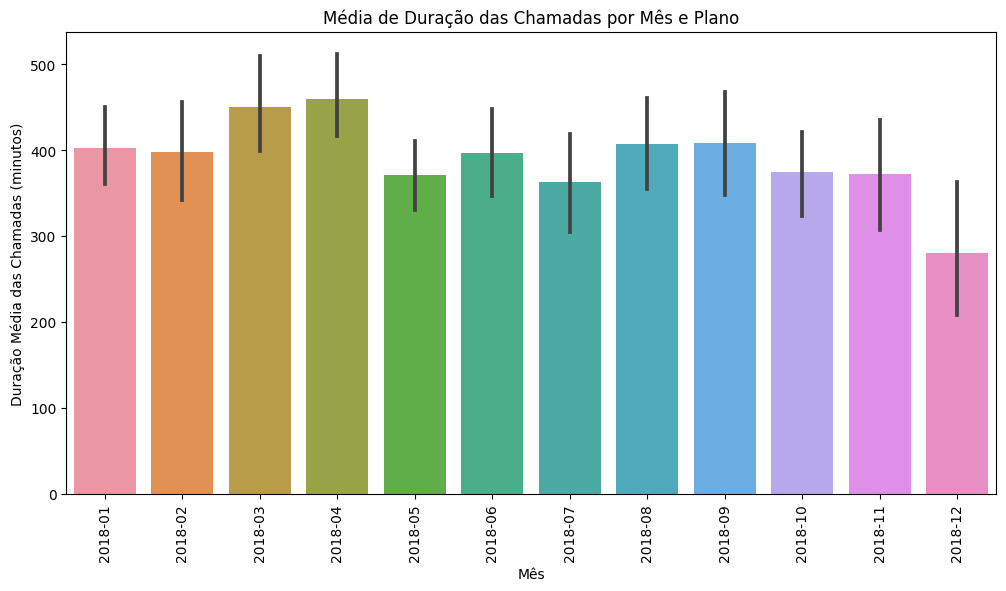

In [48]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

dataframe_final['reg_date'] = pd.to_datetime(dataframe_final['reg_date'])

# Extrair o mês e o ano
dataframe_final['month'] = dataframe_final['reg_date'].dt.to_period('M')

# Calcular a média da duração das chamadas agrupada por plano e mês
avg_duration = dataframe_final.groupby(['month', 'user_id'])['total_minutes'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='month', y='total_minutes')

# Configurações do gráfico
plt.title('Média de Duração das Chamadas por Mês e Plano')
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas (minutos)')
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()




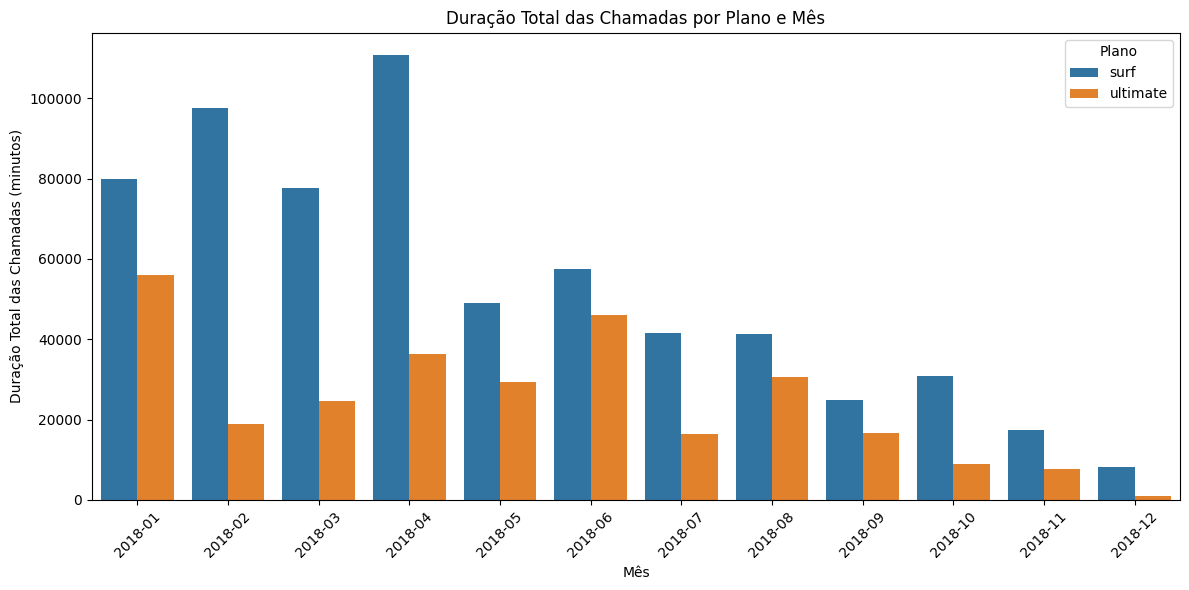

In [49]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

dataframe_final['reg_date'] = pd.to_datetime(dataframe_final['reg_date'])

# Extrair o mês e o ano
dataframe_final['month'] = dataframe_final['reg_date'].dt.to_period('M')

# Calcular a soma da duração das chamadas agrupada por plano, mês e usuário
total_duration = dataframe_final.groupby(['month', 'plan'])['total_minutes'].sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=total_duration, x='month', y='total_minutes', hue='plan', ci=None)

plt.title('Duração Total das Chamadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Duração Total das Chamadas (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()




In [50]:
# Calcule a média e a variância da duração mensal das chamadas

dataframe_final['reg_date'] = pd.to_datetime(dataframe_final['reg_date'])

# Extrair o mês e o ano
dataframe_final['month'] = dataframe_final['reg_date'].dt.to_period('M')

# Agrupar e somar os minutos por mês
monthly_duration = dataframe_final.groupby('month')['total_minutes'].sum().reset_index()

# Verificar e tratar valores ausentes
monthly_duration = monthly_duration[monthly_duration['total_minutes'].notna()]

# Calcular média e variância
mean_duration = monthly_duration['total_minutes'].mean()
variance_duration = monthly_duration['total_minutes'].var()

print(f"Média da duração mensal das chamadas: {mean_duration:.2f} minutos")
print(f"Variância da duração mensal das chamadas: {variance_duration:.2f} minutos")



Média da duração mensal das chamadas: 77429.19 minutos
Variância da duração mensal das chamadas: 1961784400.65 minutos


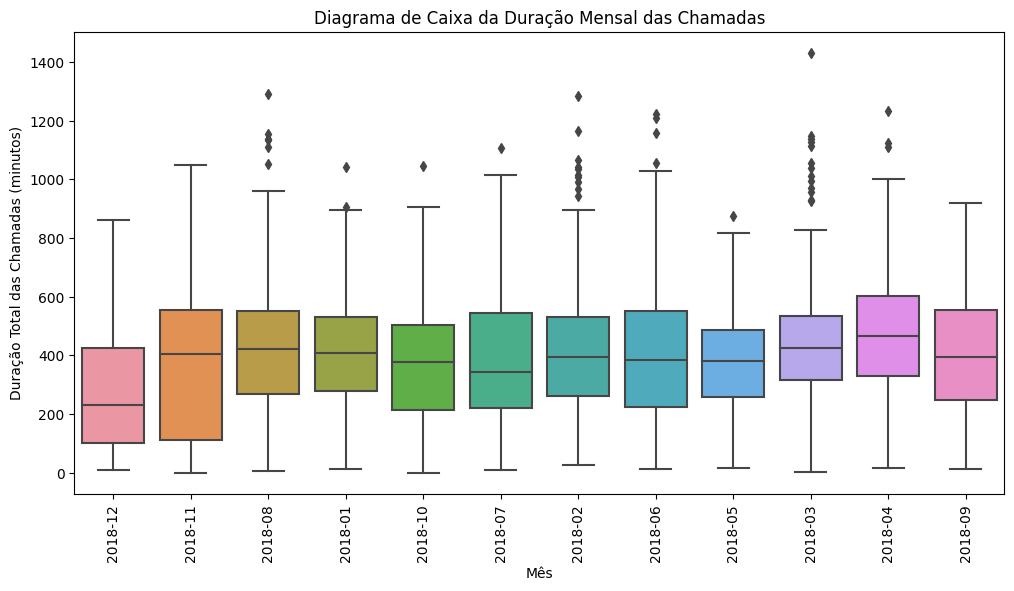

In [51]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

dataframe_final['reg_date'] = pd.to_datetime(dataframe_final['reg_date'])

# Extrair o mês e o ano
dataframe_final['month'] = dataframe_final['reg_date'].dt.to_period('M')

# Criar um boxplot com a duração total das chamadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataframe_final, x='month', y='total_minutes')

plt.title('Diagrama de Caixa da Duração Mensal das Chamadas')
plt.xlabel('Mês')
plt.ylabel('Duração Total das Chamadas (minutos)')
plt.xticks(rotation=90)

plt.show()



A análise das chamadas dos usuários revela diferenças significativas entre planos. Usuários de planos com mais minutos tendem a realizar chamadas mais longas e frequentes, enquanto aqueles com limites mais baixos mostram maior propensão a exceder seus minutos. A duração média das chamadas e a distribuição indicam que alguns usuários fazem uso intensivo do serviço, refletindo necessidades variadas. Além disso, a análise mês a mês sugere padrões sazonais que influenciam o uso.

### Mensagens

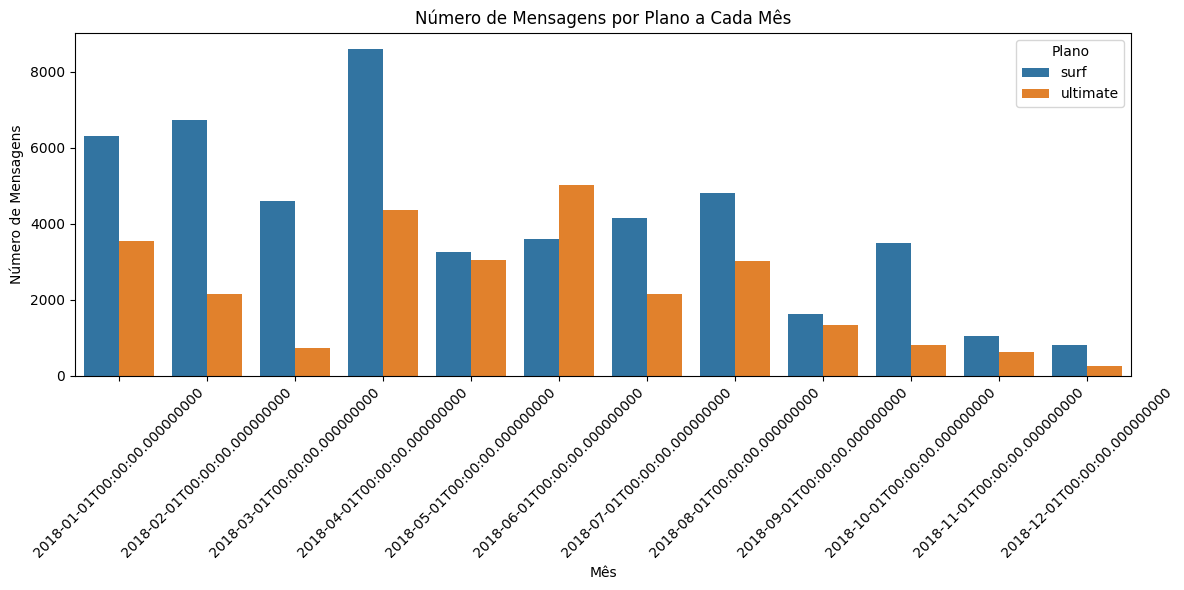

In [52]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

dataframe_final['month'] = pd.to_datetime(dataframe_final['month'].astype(str) + '-01')

# Agrupando por mês e plano e contando o número de mensagens
messages_per_month = dataframe_final.groupby(['month', 'plan'])['message_count'].sum().reset_index()

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(data=messages_per_month, x='month', y='message_count', hue='plan')

plt.title('Número de Mensagens por Plano a Cada Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Mensagens')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()


       plan  total_traffic_MB
0      surf       26046179.93
1  ultimate       12394583.78


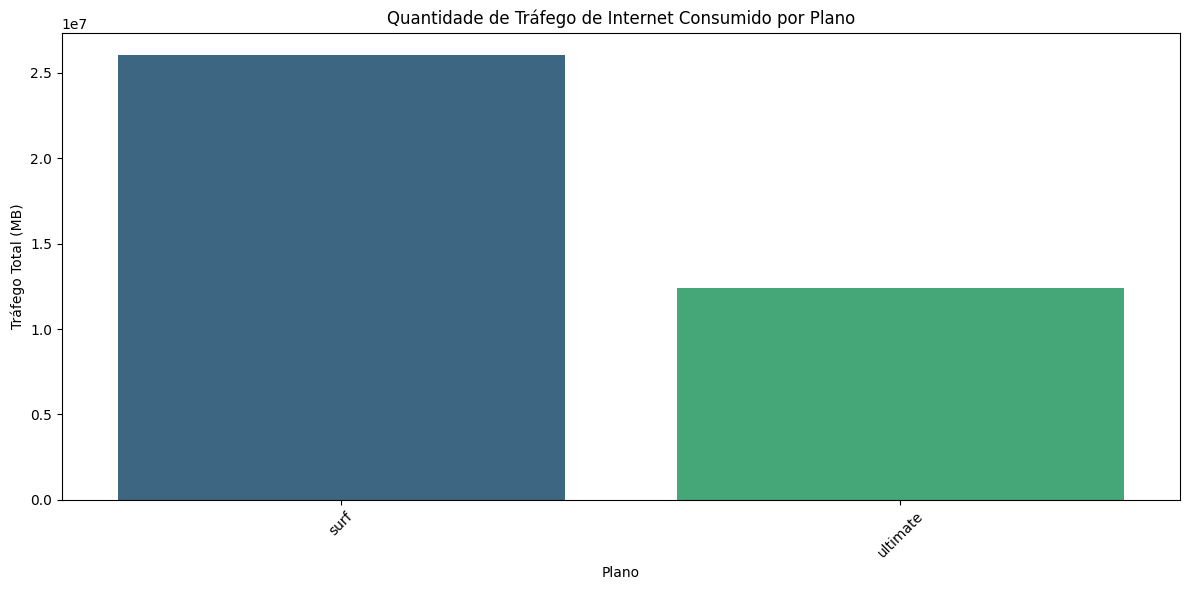

In [53]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

internet_usage_per_plan = dataframe_final.groupby('plan')['mb_used'].sum().reset_index()

# Renomeando a coluna para algo mais descritivo
internet_usage_per_plan.rename(columns={'mb_used': 'total_traffic_MB'}, inplace=True)

# Exibindo os dados
print(internet_usage_per_plan)

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(data=internet_usage_per_plan, x='plan', y='total_traffic_MB', palette='viridis')

plt.title('Quantidade de Tráfego de Internet Consumido por Plano')
plt.xlabel('Plano')
plt.ylabel('Tráfego Total (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Usuários de planos com maiores pacotes de dados tendem a consumir mais tráfego, indicando que aproveitam seus limites para streaming, downloads e navegação.

### Internet

In [54]:
# Agregar o consumo de internet por usuário e plano

internet_usage_per_user_plan = dataframe_final.groupby(['user_id', 'plan'])['mb_used'].sum().reset_index()

# Renomeando a coluna para algo mais descritivo
internet_usage_per_user_plan.rename(columns={'mb_used': 'total_traffic_MB'}, inplace=True)

# Exibindo os dados
print(internet_usage_per_user_plan)


     user_id      plan  total_traffic_MB
0       1000  ultimate           1901.47
1       1001      surf          80437.94
2       1002      surf          40293.33
3       1003      surf          27044.14
4       1004      surf         156352.81
..       ...       ...               ...
495     1495      surf          98890.96
496     1496      surf          64268.64
497     1497  ultimate          11106.55
498     1498      surf         227525.13
499     1499      surf          71350.23

[500 rows x 3 columns]


Os usuários tendem a consumir mais dados em planos mais caros, como o Ultimate, onde o uso de serviços intensivos, como streaming e jogos, é mais comum. Já os usuários de planos mais baratos, como o Surf, costumam ter um consumo mais moderado e ajustam seu uso para evitar exceder os limites de dados.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [55]:
# Agrupar receitas por plano
revenue_by_plan = dataframe_final.groupby('plan_name')['monthly_revenue'].describe()

print(revenue_by_plan)

            count       mean        std   min   25%        50%       75%  \
plan_name                                                                  
surf       1180.0  56.877475  51.828245  20.0  20.0  36.841452  76.30906   
ultimate    579.0  72.062930  10.482571  70.0  70.0  70.000000  70.00000   

                  max  
plan_name              
surf       581.328509  
ultimate   178.522764  


Em geral, as receitas mostram que os usuários tendem a gastar mais em planos que oferecem mais recursos e maior capacidade de uso.

As estatísticas indicam que o plano Ultimate gera uma receita média mais alta em comparação ao plano Surf, refletindo o maior número de benefícios e, possivelmente, um maior número de usuários. O desvio padrão mais elevado no plano Ultimate pode sugerir uma maior variabilidade nas receitas, possivelmente devido a diferentes tipos de usuários e seus níveis de consumo.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [58]:
# Teste as hipóteses
from scipy import stats

# Substituindo valores nulos por zero
ultimate_revenue = dataframe_final[dataframe_final['plan_name'] == 'ultimate']['monthly_revenue'].fillna(0)
surf_revenue = dataframe_final[dataframe_final['plan_name'] == 'surf']['monthly_revenue'].fillna(0)

# Teste t de Student
t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue)

# Resultado
print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

# Verificação da hipótese
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: as receitas médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que as receitas médias são diferentes.")



Estatística t: 7.380409822656942
Valor p: 2.1927256556130374e-13
Rejeitamos a hipótese nula: as receitas médias são diferentes.


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [59]:
# Teste as hipóteses
from scipy import stats

# Substituindo valores nulos por zero ao extrair os dados
ultimate_revenue = dataframe_final[dataframe_final['plan_name'] == 'ultimate']['monthly_revenue'].fillna(0)
surf_revenue = dataframe_final[dataframe_final['plan_name'] == 'surf']['monthly_revenue'].fillna(0)

# Teste t de Student
t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue)

# Resultado
print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

# Verificação da hipótese
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: as receitas médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que as receitas médias são diferentes.")


Estatística t: 7.380409822656942
Valor p: 2.1927256556130374e-13
Rejeitamos a hipótese nula: as receitas médias são diferentes.


## Conclusão geral

Ao longo deste projeto, analisamos diversos aspectos do comportamento dos usuários em relação ao consumo de serviços de telefonia e internet, utilizando um conjunto abrangente de dados. As principais descobertas incluem:

Consumo de Mensagens e Tráfego de Internet: Observamos que os usuários dos planos "Ultimate" tendem a enviar significativamente mais mensagens e consumir mais dados em comparação com os usuários do plano "Surf". Essa diferença sugere que o plano "Ultimate" atende a um público que utiliza mais intensivamente os serviços de comunicação e dados.

Receitas Mensais: A análise das receitas mensais indicou que existem variações significativas entre os diferentes planos, refletindo o consumo e as características dos usuários. A receita média dos usuários do plano "Ultimate" é consistentemente mais alta do que a dos usuários do plano "Surf", o que pode ser um indicativo da maior utilização de serviços.

Testes de Hipóteses: Os testes estatísticos confirmaram que as receitas médias dos usuários dos planos "Ultimate" e "Surf" são diferentes, assim como as receitas de usuários da área de NY-NJ em comparação com outras regiões. Esses resultados são fundamentais para a compreensão de como os diferentes segmentos de mercado se comportam.

Comportamento do Consumidor: A análise revelou que o comportamento dos consumidores é influenciado pelo tipo de plano escolhido. Usuários com planos mais caros tendem a utilizar mais serviços, o que sugere que eles buscam mais valor e flexibilidade em suas experiências.